## (1) Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1), The search direction a gradient descent one? Comment on that

##(2).Using steepest gradient descent, find all the local minima for the function  $J(x_1, x_2) = (x_1^2+x_2−11)^2+(x_1+x_2^2−7)^2$. While applying gradient descent, do the following.

(a) Fixing the value for alpha

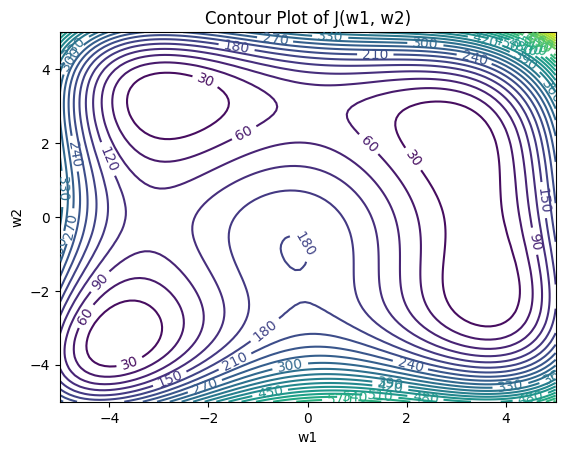

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def J(w1, w2):
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 -7)**2

w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
w1, w2 = np.meshgrid(w1, w2)
J_values = J(w1, w2)
contour = plt.contour(w1, w2, J_values, levels = 30)
plt.clabel(contour)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2)')
plt.show()

In [112]:
import numpy as np

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value

def dJ(point):
  x1 , x2 = point[0], point[1]
  dJ1 = 4*x1*(x1**2 + x2 - 11) + 2*(x1 + x2**2 -7)
  dJ2 = 2*(x1**2 + x2 - 11)+ 4*x2*(x1 + x2**2 -7)
  return np.array([dJ1, dJ2])


def brackting(w_start, direction, a,b,n):
  dw = (b-a)/n
  w1 = a
  w2 = w1 + dw
  w3 = w2 + dw
  while (w3 <= b):
    x = w_start + w1*direction
    y = w_start + w2*direction
    z = w_start + w3*direction
    if (J(x)>=J(y) and J(y)<=J(z)):
      final = np.array([w1,w3])
      return final
    else:
      w1 = w2
      w2 = w3
      w3 = w3 +dw
  if (J(w_start + a*direction) > J(w_start + b*direction)):
    return np.array([(b - dw), b])
  else:
    return np.array([a, (a + dw)])

def interval_halving_method(w_start, direction, a, b):
    epsilon = 10e-5
    L = b - a
    wm = (a + b) / 2

    while L > epsilon:
        w1 = a + L / 4
        w2 = b - L / 4
        x = w_start + w1*direction
        y = w_start + wm*direction
        z = w_start + w2*direction
        J_w1 = J(x)
        J_w2 = J(z)
        J_wm = J(y)

        if J_w1 < J_wm:
            b = wm
            wm = w1
        elif J_w2 < J_wm:
            a = wm
            wm = w2
        else:
            a = w1
            b = w2

        L = b - a

    return wm

def unidirectional(w_start , direction, n):
  alpha1 = 0
  alpha2 = 5
  interval = brackting(w_start, direction, alpha1, alpha2, n)

  pt = interval_halving_method(w_start, direction, interval[0], interval[1])

  return pt

def grad_descent(start_point):
  iteration = 0
  w = start_point
  grad = dJ(w)
  eps = 10e-5
  iterates = []
  iterates.append(list(w))

  while(pow(np.dot(grad, grad), 0.5) > eps and iteration < 1000):
    direction = - grad
    alpha = unidirectional(w , direction, 50)
    w = w - alpha * grad
    iterates.append(list(w))
    iteration = iteration + 1
    grad = dJ(w)

  iterates = np.array(iterates)
  return w, iterates


def grad_descent_alpha(start_point):
  iteration = 0
  w = start_point
  grad = dJ(w)
  eps = 10e-5
  iterates = []
  iterates.append(list(w))

  while(pow(np.dot(grad, grad), 0.5) > eps and iteration < 1000):
    direction = - grad
    alpha = 0.01
    w = w - alpha * grad
    iterates.append(list(w))
    iteration = iteration + 1
    grad = dJ(w)

  iterates = np.array(iterates)
  return w, iterates

optimal point by Gradient Descent using fixed alpha [2.99999889 2.00000268]


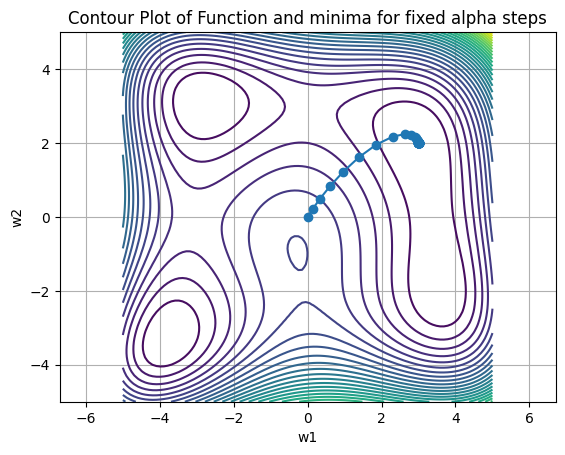

In [113]:
starting_point = np.array([0, 0])
pt, iter = grad_descent_alpha(starting_point)

print(f'optimal point by Gradient Descent using fixed alpha {pt}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter[:, 0], iter[:, 1], 'o-')

plt.title('Contour Plot of Function and minima for fixed alpha steps')
plt.grid(True)
plt.axis('equal')
plt.show()

optimal point by Gradient Descent using fixed alpha [-3.77930966 -3.28318481]


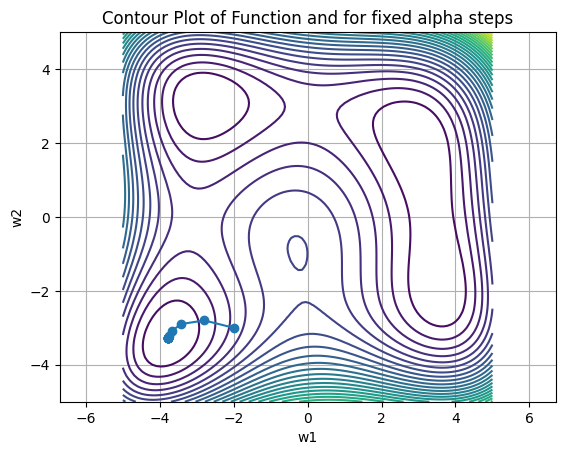

In [114]:
starting_point = np.array([-2, -3])
pt, iter = grad_descent_alpha(starting_point)

print(f'optimal point by Gradient Descent using fixed alpha {pt}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter[:, 0], iter[:, 1], 'o-')

plt.title('Contour Plot of Function and for fixed alpha steps')
plt.grid(True)
plt.axis('equal')
plt.show()

optimal point by Gradient Descent using fixed alpha [-2.80511747  3.13131247]


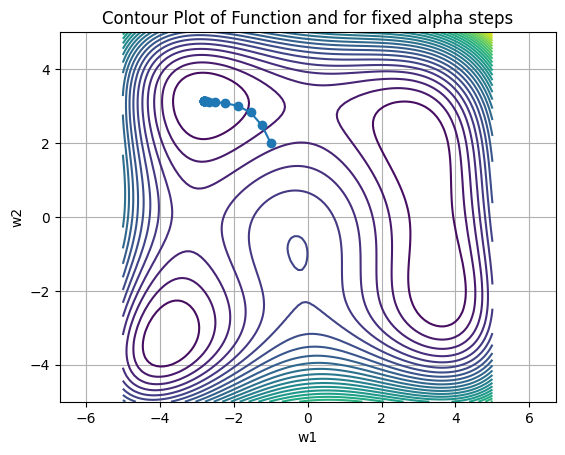

In [99]:
starting_point = np.array([-1, 2])
pt, iter = grad_descent_alpha(starting_point)

print(f'optimal point by Gradient Descent using fixed alpha {pt}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter[:, 0], iter[:, 1], 'o-')

plt.title('Contour Plot of Function and for fixed alpha steps')
plt.grid(True)
plt.axis('equal')
plt.show()

optimal point by Gradient Descent using fixed alpha [ 3.58442865 -1.8481299 ]


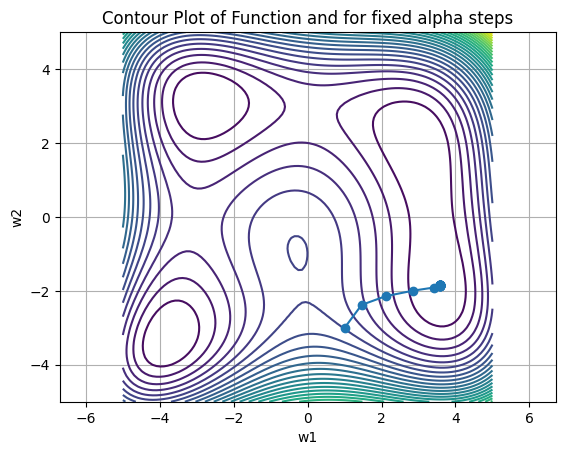

In [110]:
starting_point = np.array([1, -3])
pt, iter = grad_descent_alpha(starting_point)

print(f'optimal point by Gradient Descent using fixed alpha {pt}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter[:, 0], iter[:, 1], 'o-')

plt.title('Contour Plot of Function and for fixed alpha steps')
plt.grid(True)
plt.axis('equal')
plt.show()

#(b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.

optimal point by Gradient Descent Method using line search [2.99999818 2.00000265]


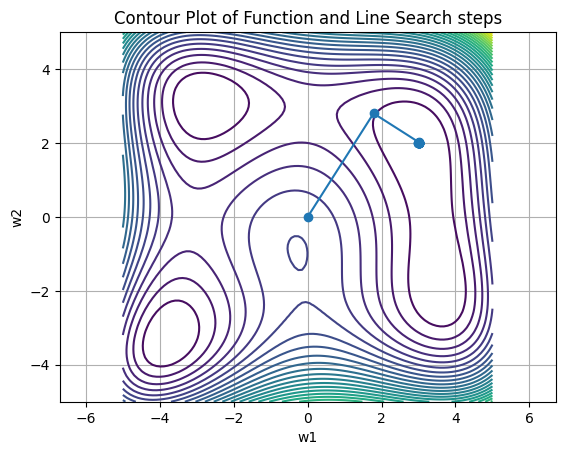

In [101]:
starting_point = np.array([0, 0])
pt1, iter1 = grad_descent(starting_point)

print(f'optimal point by Gradient Descent Method using line search {pt1}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter1[:, 0], iter1[:, 1], 'o-')

plt.title('Contour Plot of Function and Line Search steps')
plt.grid(True)
plt.axis('equal')
plt.show()

optimal point by Gradient Descent Method using line search [-3.77930989 -3.28318511]


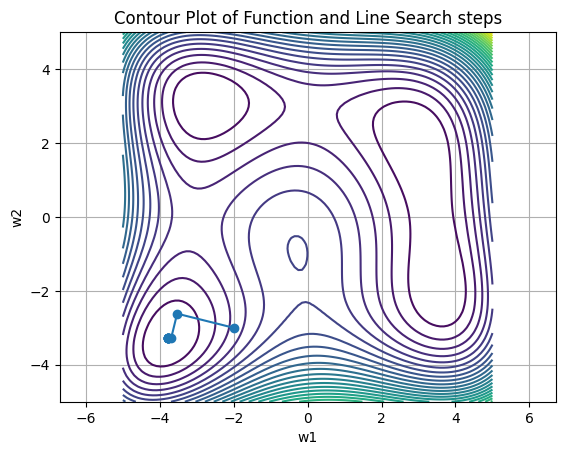

In [102]:
starting_point = np.array([-2, -3])
pt1, iter1 = grad_descent(starting_point)

print(f'optimal point by Gradient Descent Method using line search {pt1}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter1[:, 0], iter1[:, 1], 'o-')

plt.title('Contour Plot of Function and Line Search steps')
plt.grid(True)
plt.axis('equal')
plt.show()

optimal point by Gradient Descent Method using line search [-2.80511793  3.13131227]


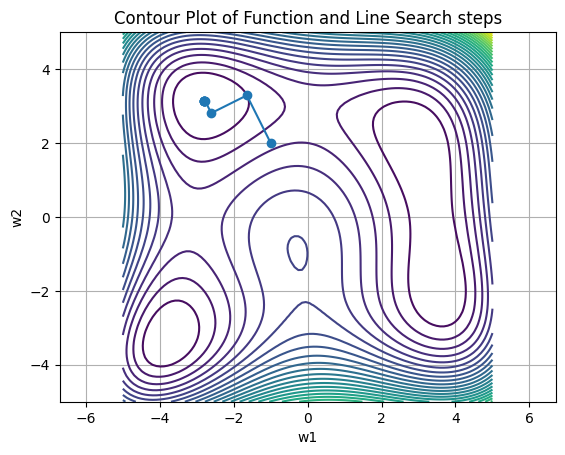

In [103]:
starting_point = np.array([-1, 2])
pt1, iter1 = grad_descent(starting_point)

print(f'optimal point by Gradient Descent Method using line search {pt1}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter1[:, 0], iter1[:, 1], 'o-')

plt.title('Contour Plot of Function and Line Search steps')
plt.grid(True)
plt.axis('equal')
plt.show()

optimal point by Gradient Descent Method using line search [ 3.5844284  -1.84812705]


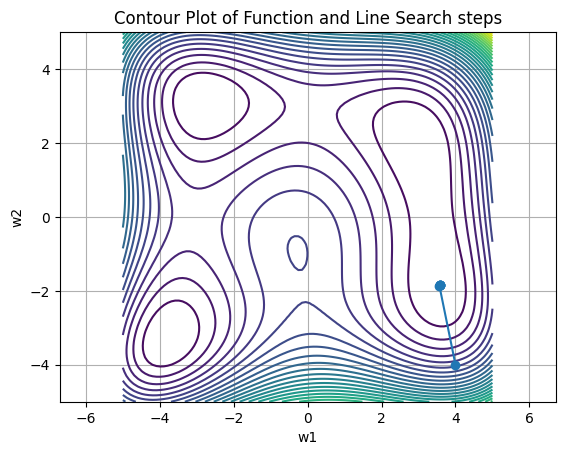

In [116]:
starting_point = np.array([4, -4])
pt1, iter1 = grad_descent(starting_point)

print(f'optimal point by Gradient Descent Method using line search {pt1}')

def J(x):
  value = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2
  return value


w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 -7)**2

plt.contour(W1, W2, Z, levels = 30)

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(iter1[:, 0], iter1[:, 1], 'o-')

plt.title('Contour Plot of Function and Line Search steps')
plt.grid(True)
plt.axis('equal')
plt.show()